### Have you ever wondered if you should pay 1000€ for a smartphone? 
Does the price really come with the quality? 
Will it indeed serve you a longer time, and hence make the price worth it?

For example, If 30€ generic pair of jeans last 12 months, 
it's not worth it to pay 120€ for Levi's that last 18 months, 
as you could have 48 months worth of jeans vs 18 months, for the same price.

In my personal experience, I have noticed that expensive electronics break as often as cheap ones do. 
I also have noticed, that while it is worth to pay slightly more for a device (buy the second cheapest device), 
it often wasn't a good deal to pay premium.

So far this is just an opinion - what would the data say?

To this aim, I am going to scrape Amazon reviews forsmartphones to find out 
if more expensive smartphones result in more customer happiness.

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
import random
import re
from selenium.common.exceptions import NoSuchElementException
import requests
from selenium.webdriver.support.ui import Select
import matplotlib.pyplot as plt
%matplotlib notebook
import random
from random import shuffle
import re
pd.options.mode.chained_assignment = None

/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [154]:
driver = webdriver.Firefox()
driver.get('https://www.amazon.de/s?i=electronics&bbn=3468301&rh=n%3A562066%2Cn%3A569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3AHUAWEI&dc&page=5&fst=as%3Aoff&qid=1576861861&rnid=669059031&ref=sr_pg_5')


In [155]:
soup = BeautifulSoup(driver.page_source, "lxml")
boxes = soup.findAll("a", attrs={'class' : 'a-link-normal a-text-normal'})

In [168]:
b1 = boxes[4]

In [171]:
b1.find_next_siblings()

[]

In [48]:
glossary = "https://www.amazon.de/s/other?rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301&pickerToList=lbr_brands_browse-bin&qid=1576592710&ref=sr_sa_p_89"

apple = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3AApple&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_4'
google = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3AGoogle&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_16'
htc = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3AHTC&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_19'
huawei = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3AHUAWEI&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_20'
lg = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3ALG+Electronics&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_23'
moto = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3AMotorola+Mobility&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_24'
nokia = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3ANokia&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_25'
sony = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3ASony&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_36'
xiaomi = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3AXiaomi&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_48'
samsung = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3ASamsung&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_30'

# Product link harvesting (new)

In [193]:
driver = webdriver.Firefox()
all_data = []

for brand_url in [apple, google, htc, huawei, lg, moto, nokia, sony, xiaomi, samsung]:
    driver.get(brand_url)
    
    while True:
        time.sleep(random.randint(3, 9))
        if 'last_url' in locals():
            if driver.page_source == last_url:
                print('end of results, next button doesnt work')
                break
        
        soup = BeautifulSoup(driver.page_source, "lxml")
        boxes = soup.findAll('span', attrs={'class' : re.compile('SEARCH_RESULTS')})
        
        if not boxes:
            print("no boxes found")
            break
            
        for box in boxes:
            
            title = box.find("a", attrs={'class' : 'a-link-normal a-text-normal'}).getText()
            link = box.find("a", attrs={'class' : 'a-link-normal a-text-normal'}).attrs['href']

            reviews = box.find('a', attrs={'href' : re.compile('customerReviews')})

            # to scrape ethically, we will not crawl products with no reviews or too few in vain

            if reviews:
                review_count = reviews.getText().strip()
            else:
                review_count = 0

            part = [ (link, title, review_count, driver.current_url, i)]
            all_data.extend(part)
            
        pd.DataFrame(all_data).to_csv('amazon_links_2.csv')
        
        nextpage = driver.find_element_by_class_name('a-last')
        last_url = driver.page_source
        nextpage.click()

end of results, next button doesnt work
end of results, next button doesnt work
end of results, next button doesnt work
no boxes found
no boxes found
end of results, next button doesnt work
end of results, next button doesnt work
no boxes found
end of results, next button doesnt work
end of results, next button doesnt work


In [194]:
links = pd.DataFrame(all_data)
links.columns = ['link', 'title', 'reviews', 'source', 'i']

links = links[~links.link.str.lower().str.contains('tablet')]

links.link = 'https://www.amazon.de' + links.link

In [204]:
links.reviews = links.reviews.str.replace(',', '')#.apply(int)

In [212]:
links.reviews.fillna(0, inplace=True)

In [216]:
links = links[links.reviews.apply(int) > 15]

In [217]:
links.head()

,link,title,reviews,source,i
0,https://www.amazon.de/Apple-iPhone-11-128-GB-W...,\nApple iPhone 11 (128 GB) - Weiß\n,342,https://www.amazon.de/s?bbn=3468301&rh=n%3A562...,68
1,https://www.amazon.de/Apple-iPhone-Pro-256-GB-...,\nApple iPhone 11 Pro (256 GB) - Nachtgrün\n,139,https://www.amazon.de/s?bbn=3468301&rh=n%3A562...,68
2,https://www.amazon.de/Apple-iPhone-11-128-GB-P...,\nApple iPhone 11 (128 GB) - (PRODUCT)RED\n,342,https://www.amazon.de/s?bbn=3468301&rh=n%3A562...,68
3,https://www.amazon.de/Apple-iPhone-11-Pro-256-...,\nApple iPhone 11 Pro (256 GB) - Space Grau\n,139,https://www.amazon.de/s?bbn=3468301&rh=n%3A562...,68
4,https://www.amazon.de/Apple-iPhone-11-64-GB-Sc...,\nApple iPhone 11 (64 GB) - Schwarz\n,342,https://www.amazon.de/s?bbn=3468301&rh=n%3A562...,68


In [218]:
links.to_csv('amazon_links_2_slimmed.csv')

# Price and Review harvesting

In [ ]:
driver = webdriver.Firefox()
prod_data = []
bad_urls = []

all_links = links.link.tolist()
shuffle(all_links)
all_links = list(set(all_links))

for url in all_links:
    try:
        driver.get(url)
        time.sleep(random.randint(3, 9))
        soup = BeautifulSoup(driver.page_source, 'lxml')

        avg = soup.find('div', attrs={'class' : 'a-fixed-left-grid AverageCustomerReviews a-spacing-small'})

        # no reviews
        if not avg:
            print(url)
            bad_urls.append(url)
            continue

        avg_rating = avg.find('span', attrs={'class' : 'a-size-medium a-color-base'}).getText()

        hist = soup.find('table', attrs={'id' : 'histogramTable'})
        hist_txt = str(hist.findNextSiblings()[0])
        distr = list(set(re.findall("([0-9]+)% der Rezensionen haben (\d) Sterne", hist_txt)))
        #review_count = re.findall( '([0-9]+) Sternebewertungen', driver.page_source)
        review_count = soup.find('div', attrs={'data-hook' : 'total-review-count'}).getText().strip()


        pricebox = soup.find('div', attrs={'id' : 'price'})
        try:
            price = pricebox.find('span', attrs={'class': 'a-size-medium a-color-price priceBlockBuyingPriceString'}).getText()
            price_type = 'official'
        except:
            try:
                price = soup.find(text=re.compile("Neu \([0-9]+\) ab")).findNext().getText()
                price_type = '3rd party'
            except:
                print(url)
                bad_urls.append(url)
                continue

        title = soup.find('span', attrs={'id' : 'productTitle'}).getText().strip()

        one = [distr, review_count, avg_rating, price, price_type, title, url]
        prod_data.append(one)

        pd.DataFrame(prod_data).to_excel('product_data.xlsx')
    except Exception as e:
        print(e, url)

In [458]:
df = pd.DataFrame(prod_data, columns=['star_hist', 'rev_count', 'avg_rev', 'price', 'price_cat', 'title', 'link', ])

In [228]:
df.to_pickle('amazon_data.pkl')

In [2]:
df = pd.read_pickle('amazon_data.pkl')

# Data cleaning

In [3]:
df.head()

,star_hist,rev_count,avg_rev,price,price_cat,title,link
0,"[(6, 3), (21, 1), (14, 4), (7, 2), (53, 5)]",742 Sternebewertungen,"3,7 von 5","269,99 €",official,Apple iPhone 7 128GB Roségold (Generalüberholt),https://www.amazon.de/Apple-iPhone-SIM-Free-Ro...
1,"[(23, 3), (18, 2), (19, 4), (22, 5), (18, 1)]",27 Sternebewertungen,"3,1 von 5","199,90 €",official,HTC Rhyme Smartphone (9.4 cm (3.7 Zoll) Touchs...,https://www.amazon.de/HTC-Smartphone-Touchscre...
2,"[(7, 3), (4, 2), (59, 5), (12, 4), (18, 1)]",36 Sternebewertungen,"3,9 von 5","330,19 €",official,"Samsung Galaxy S8+ Smartphone (6,2 Zoll (15,8 ...",https://www.amazon.de/Samsung-Smartphone-Touch...
3,"[(13, 1), (8, 3), (4, 2), (15, 4), (59, 5)]",86 Sternebewertungen,4 von 5,"349,90 €",official,"Samsung Galaxy S III Neo Smartphone (4,8 Zoll ...",https://www.amazon.de/Samsung-Smartphone-Touch...
4,"[(13, 4), (16, 1), (64, 5), (3, 2), (3, 3)]",54 Sternebewertungen,"4,1 von 5","527,12 €",official,Apple iPhone 8 Plus 256GB Space Grau (Generalü...,https://www.amazon.de/Apple-iPhone-Display-SIM...


In [4]:
df.rev_count = df.rev_count.str.split().str[0].str.replace('.', '').apply(int)

In [5]:
df = df[df.price != '']

In [6]:
df.price = df.price.str.replace('\s€|\.', '').str.replace(',', '.').apply(float).round(0)

In [7]:
df.head()

,star_hist,rev_count,avg_rev,price,price_cat,title,link
0,"[(6, 3), (21, 1), (14, 4), (7, 2), (53, 5)]",742,"3,7 von 5",270.0,official,Apple iPhone 7 128GB Roségold (Generalüberholt),https://www.amazon.de/Apple-iPhone-SIM-Free-Ro...
1,"[(23, 3), (18, 2), (19, 4), (22, 5), (18, 1)]",27,"3,1 von 5",200.0,official,HTC Rhyme Smartphone (9.4 cm (3.7 Zoll) Touchs...,https://www.amazon.de/HTC-Smartphone-Touchscre...
2,"[(7, 3), (4, 2), (59, 5), (12, 4), (18, 1)]",36,"3,9 von 5",330.0,official,"Samsung Galaxy S8+ Smartphone (6,2 Zoll (15,8 ...",https://www.amazon.de/Samsung-Smartphone-Touch...
3,"[(13, 1), (8, 3), (4, 2), (15, 4), (59, 5)]",86,4 von 5,350.0,official,"Samsung Galaxy S III Neo Smartphone (4,8 Zoll ...",https://www.amazon.de/Samsung-Smartphone-Touch...
4,"[(13, 4), (16, 1), (64, 5), (3, 2), (3, 3)]",54,"4,1 von 5",527.0,official,Apple iPhone 8 Plus 256GB Space Grau (Generalü...,https://www.amazon.de/Apple-iPhone-Display-SIM...


In [8]:
df.avg_rev = df.avg_rev.str.split(' von').str[0].str.replace(',', '.').apply(float)

In [9]:
df['brand'] = df.title.str.strip().str.lower().str.split().str[0]

In [10]:
df.brand.value_counts()

samsung      326
apple        169
huawei       134
sony          89
nokia         89
xiaomi        79
htc           60
motorola      36
lg            10
moto           6
google         4
honor          3
pocophone      3
mi             2
mobile         1
​samsung       1
'samsung       1
microsoft      1
nokia-130      1
Name: brand, dtype: int64

In [11]:
df.brand.value_counts().index[:10]

Index(['samsung', 'apple', 'huawei', 'sony', 'nokia', 'xiaomi', 'htc',
       'motorola', 'lg', 'moto'],
      dtype='object')

In [12]:
df = df[df.brand.isin(df.brand.value_counts().index[:10])]

In [13]:
df.brand = df.brand.apply(lambda x: 'motorola' if x == 'moto' else x)

In [14]:
for col in ['share_1', 'share_2', 'share_3', 'share_4', 'share_5']:
    df[col] = None

In [15]:
df.head(2)

,star_hist,rev_count,avg_rev,price,price_cat,title,link,brand,share_1,share_2,share_3,share_4,share_5
0,"[(6, 3), (21, 1), (14, 4), (7, 2), (53, 5)]",742,3.7,270.0,official,Apple iPhone 7 128GB Roségold (Generalüberholt),https://www.amazon.de/Apple-iPhone-SIM-Free-Ro...,apple,None,None,None,None,None
1,"[(23, 3), (18, 2), (19, 4), (22, 5), (18, 1)]",27,3.1,200.0,official,HTC Rhyme Smartphone (9.4 cm (3.7 Zoll) Touchs...,https://www.amazon.de/HTC-Smartphone-Touchscre...,htc,None,None,None,None,None


In [16]:

def extract_shares(row):
    for item in row['star_hist']:
        star = str(item[1])
        row['share_' + star] = int(item[0])
    return row

df = df.apply(extract_shares, axis=1)

In [17]:
df[['share_1', 'share_2', 'share_3', 'share_4', 'share_5']].fillna(0, inplace=True)

In [18]:
df['share_positive'] = df['share_4'] + df['share_5']
df['share_negative'] = df['share_1'] + df['share_2']

In [19]:
df.head(2)

,star_hist,rev_count,avg_rev,price,price_cat,title,link,brand,share_1,share_2,share_3,share_4,share_5,share_positive,share_negative
0,"[(6, 3), (21, 1), (14, 4), (7, 2), (53, 5)]",742,3.7,270.0,official,Apple iPhone 7 128GB Roségold (Generalüberholt),https://www.amazon.de/Apple-iPhone-SIM-Free-Ro...,apple,21.0,7.0,6.0,14.0,53,67.0,28.0
1,"[(23, 3), (18, 2), (19, 4), (22, 5), (18, 1)]",27,3.1,200.0,official,HTC Rhyme Smartphone (9.4 cm (3.7 Zoll) Touchs...,https://www.amazon.de/HTC-Smartphone-Touchscre...,htc,18.0,18.0,23.0,19.0,22,41.0,36.0


In [20]:
df = df[~df.share_positive.isnull()]

In [21]:
df.to_pickle('amazon_clean.pkl')

# Visualizing the price - quality relationship

In [22]:
import seaborn as sns

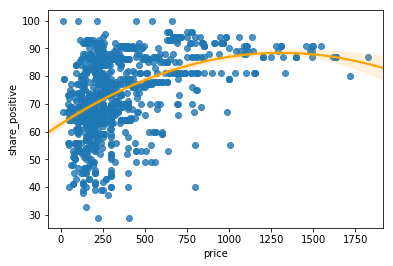

In [271]:
plt.figure()
sns.regplot(df.price, df.share_positive, line_kws={'color':'orange'}, order=2);

In [429]:
# It looks like the two variables are correlated, but up to a certain point.
# This means, there is an optimal price you should pay (but no more) to get the most out of your buck.

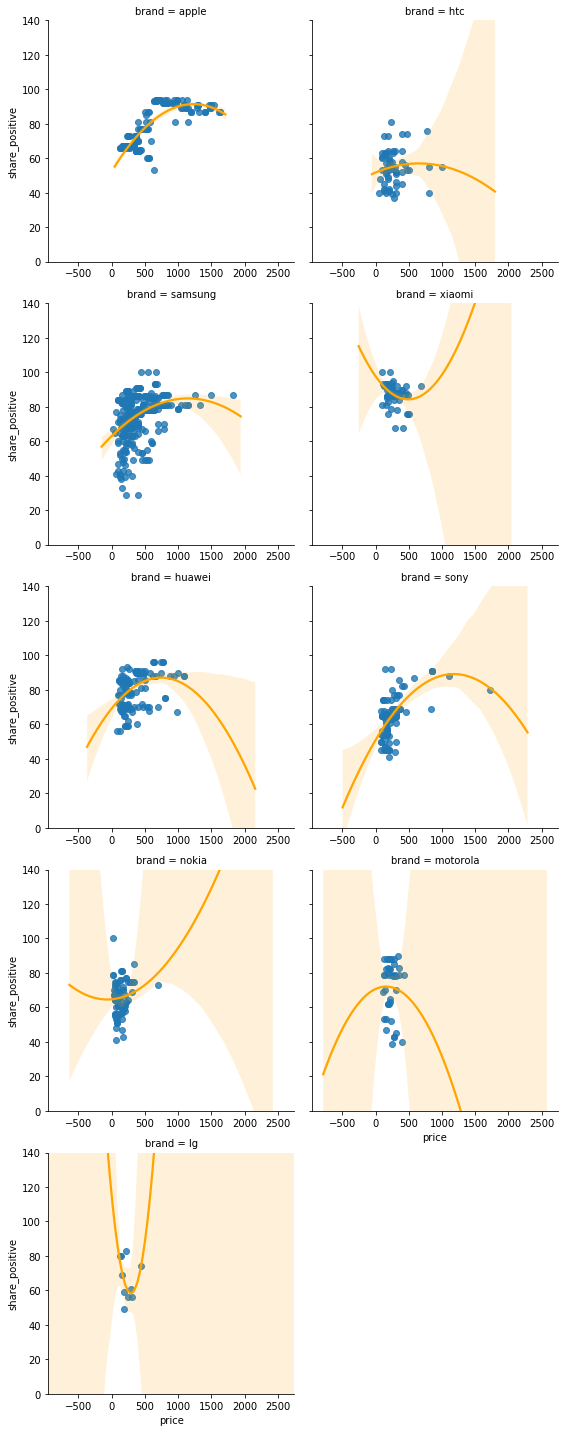

In [28]:
g = sns.FacetGrid(df, col="brand", col_wrap=2, height=4, ylim=(0, 140))
g.map(sns.regplot, 'price', 'share_positive', line_kws={'color':'orange'}, order=2)

for ax in g.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True)

In [489]:
from scipy.stats import pearsonr

corrs = []

for brand in df.brand.unique():
    temp = df[df.brand == brand]
    corr, _ = pearsonr(temp.price, temp.share_positive)
    corrs.append([brand, corr])

cor_df = pd.DataFrame(corrs, columns=['brand', 'correlation']).sort_values(by='correlation', ascending=False)


In [491]:
def get_buckets(val):
    if abs(val) > 0.5:
        return 'STRONG'
    if abs(val) > 0.3:
        return 'MODERATE'
    else:
        return 'NO RELATIONSHIP'

In [493]:
cor_df['relationship'] = cor_df.correlation.apply(get_buckets)

In [494]:
cor_df

,brand,correlation,relationship
0,apple,0.760626,STRONG
5,sony,0.541938,STRONG
2,samsung,0.358781,MODERATE
4,huawei,0.348135,MODERATE
6,nokia,0.172826,NO RELATIONSHIP
1,htc,0.087866,NO RELATIONSHIP
7,motorola,-0.053021,NO RELATIONSHIP
8,lg,-0.148169,NO RELATIONSHIP
3,xiaomi,-0.340541,MODERATE


# Finding the optimal price to pay for a smartphone

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import operator

In [102]:
apple = df[df.brand == 'apple']

In [179]:
x = np.array(apple.price).reshape(-1, 1)
y = np.array(apple.share_positive).reshape(-1, 1)

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

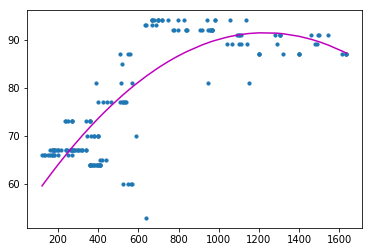

In [73]:
plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')

### Derivative calculation method 1

In [182]:
from sympy import *
x = Symbol('x')

intercept = model.intercept_[0]
coef_1 = model.coef_[0][1]
coef_2 = model.coef_[0][2]


f = intercept + (coef_1 * x) + (coef_2 * (x ** 2))

f_prime = f.diff(x)
print(f_prime)
f = lambdify(x, f)
f_prime = lambdify(x, f_prime)

derivatives = [f_prime(val) for val in range(int(min(apple.price)), int(max(apple.price))) ]

0.0634176501728123 - 5.15414800766334e-5*x


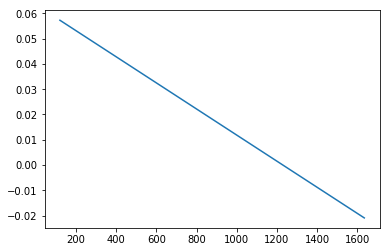

In [184]:
plt.plot(range(int(min(apple.price)), int(max(apple.price))), derivatives );

### Derivative calculation method 2

In [185]:
p = np.poly1d([coef_2, coef_1, intercept])

In [186]:
p2 = np.polyder(p)

In [187]:
ders = [p2(x) for x in  range(int(min(apple.price)), int(max(apple.price)))]

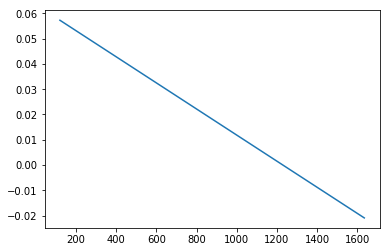

In [188]:
plt.plot(list(range(int(min(apple.price)), int(max(apple.price)))), ders)

In [209]:
def calculate_derivatives(intercept, coef_1, coef_2, brand_df):
    x = Symbol('x')

    f = intercept + (coef_1 * x) + (coef_2 * (x ** 2))

    f_prime = f.diff(x)
    f = lambdify(x, f)
    f_prime = lambdify(x, f_prime)

    derivatives = [(price, f_prime(price)) for price in range(int(min(brand_df.price)), int(max(brand_df.price))) ]
    return derivatives

# Generalizing the results per brand

In [210]:
models = {}

for brand in ['apple', 'sony', 'samsung', 'huawei']:
    temp = df[df.brand == brand]
    
    x = np.array(temp.price).reshape(-1, 1)
    y = np.array(temp.share_positive).reshape(-1, 1)

    polynomial_features= PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    models[brand] = model

In [211]:
models

{'apple': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 'sony': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 'samsung': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 'huawei': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False)}

In [212]:
derivatives = {}

for brand in ['apple', 'sony', 'samsung', 'huawei']:
    temp = df[df.brand == brand]
    derivatives[brand] = calculate_derivatives(models[brand].intercept_[0], 
                                               models[brand].coef_[0][1],
                                              models[brand].coef_[0][2],
                                              temp)

# Finding the optimal price to pay

#### The optimal price to pay depends on the price sensitivity of the customer, but should lay before the max of the regression line, as past this point, we start having negative return on investment. I will pick it to be exactly halfway between the function start and it's max, because I'm a penny pincher.

In [243]:
optimals = {}
for brand in ['apple', 'sony', 'samsung', 'huawei']:
    optimal_der = max([x[1] for x in derivatives[brand] if x[1] > 0]) / 2
    for price, der in derivatives[brand]:
        if der > optimal_der:
            continue
        else:
            optimals[brand] = price
            break

In [244]:
optimals

{'apple': 676, 'sony': 627, 'samsung': 581, 'huawei': 416}

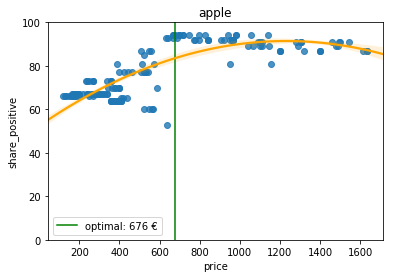

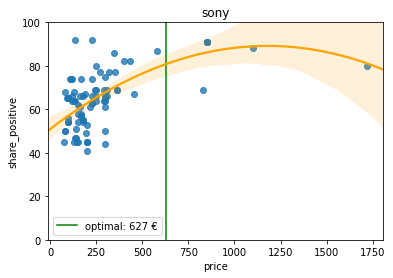

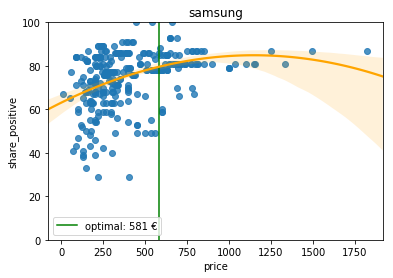

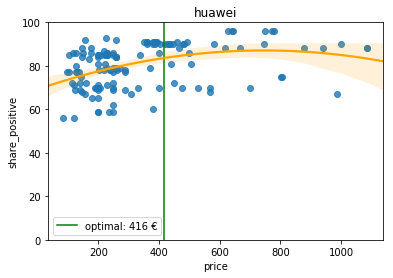

In [264]:
for brand in ['apple', 'sony', 'samsung', 'huawei']:
    temp = df[df.brand == brand]
    
    plt.figure()
    plt.ylim(0, 100)
    plt.axvline(optimals[brand], 0, 90, color='green', label=f'optimal: { optimals[brand] } €')
    plt.legend(loc=3)
    sns.regplot(temp.price, temp.share_positive, line_kws={'color':'orange'}, order=2,).set_title(brand);

# Conclusion

The price-quality relationship varies greatly by brand. We found positive price quality relationship for:

- Apple
- Sony
- Samsung
- Huawei

No conclusive relationship was found for:

- Nokia
- HTC
- Motorola
- LG

Negative relationship was found for:

- Xiaomi

Even for the brands where the relationship is strong, there is a point at which it plateaus, meaning it's not worth spending more than X € on a phone of this brand.


# Limitations

1. The price falls over time. When scraping older phones, we get their discounted price. Ideally, the price upon release should be used.

2. Many models no longer were sold new, only used or refurbished price was available, which had to be disregarded.

3. It might be the case that low ratings for very expensive phones come from the fact that the expectations of the user were very high too, not because the phone itself was of bad quality. Hence, a 1-star review for a 200€ vs 1000€ phone does not indicate same quality for both.

4. Only a very small proportion of buyers leave reviews, often the most happy or unhappy ones, from a specific demographic. Ideally the data should be collected from a random sample of all buyers, not only the prolific reviewers.

5. It could be the case that the reviews tend to be good for newest models, but slowly deteriorate, as time passes, due to faults caused by planned obsolence. Hence newer models might have better reviews.